In [1]:
pip install pandas

from google.colab import files

uploaded = files.upload()

 from google.colab import files

files.upload()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'


In [4]:
!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023


Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
License(s): other
 90% 129M/143M [00:02<00:00, 79.1MB/s]
100% 143M/143M [00:02<00:00, 59.7MB/s]


In [5]:
import zipfile
import os

# Define the path to your zip file
file_path = '/content/credit-card-fraud-detection-dataset-2023.zip'  # Check if the file is in this location

# Check if the file exists
if os.path.exists(file_path):
    # Unzip the file to a specific destination
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall('/content/drive/MyDrive/kaggle')  # Replace 'destination_folder' with your desired folder
else:
    print("Error: File not found. Please check the file path and ensure the dataset has been downloaded.")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv('/content/drive/MyDrive/kaggle/creditcard_2023.csv')
print(data)


            id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22  

In [8]:

df = pd.read_csv('/content/drive/MyDrive/kaggle/creditcard_2023.csv')
#Check for missing values
print(df.isnull().sum())

#Drop rows with missing valiues and place it in a new variable "df_cleaned"
df_cleaned = df.dropna()

#Fill missing values with mean for numerical data and place it ina new variable called df_filled
df_filled = df.fillna(df.mean())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
#Identify duplicates
print(df.duplicated().sum())

#Remove duplicates
df_no_duplicates = df.drop_duplicates()


0


In [10]:
!pip install featuretools
import featuretools as ft


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 9.6 MB/s eta 0:00:00


In [11]:


# Calculate the percentage of rows with 'Class' equal to 1
percentage_class_1 = (df['Class'].value_counts()[1] / len(df)) * 100

print("Percentage of rows with 'Class' equal to 1: {:.2f}%".format(percentage_class_1))


Percentage of rows with 'Class' equal to 1: 50.00%


In [12]:
!pip install imbalanced-learn

In [13]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [14]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


No Frauds 50.0 % of the dataset
Frauds 50.0 % of the dataset


<ipython-input-15-bf4f9d4bf383>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=colors)


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

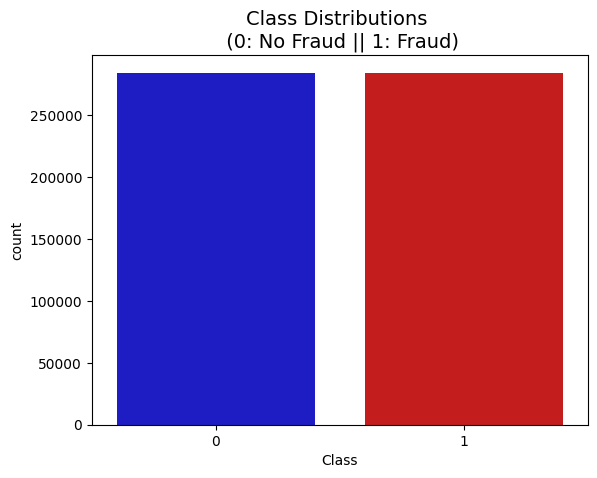

In [15]:

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)


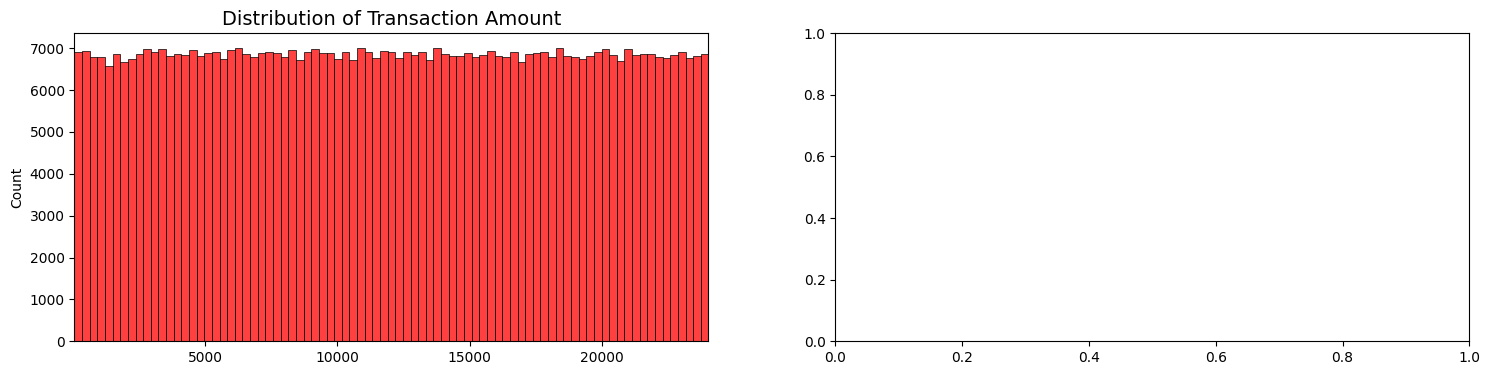

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values


sns.histplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])



plt.show()

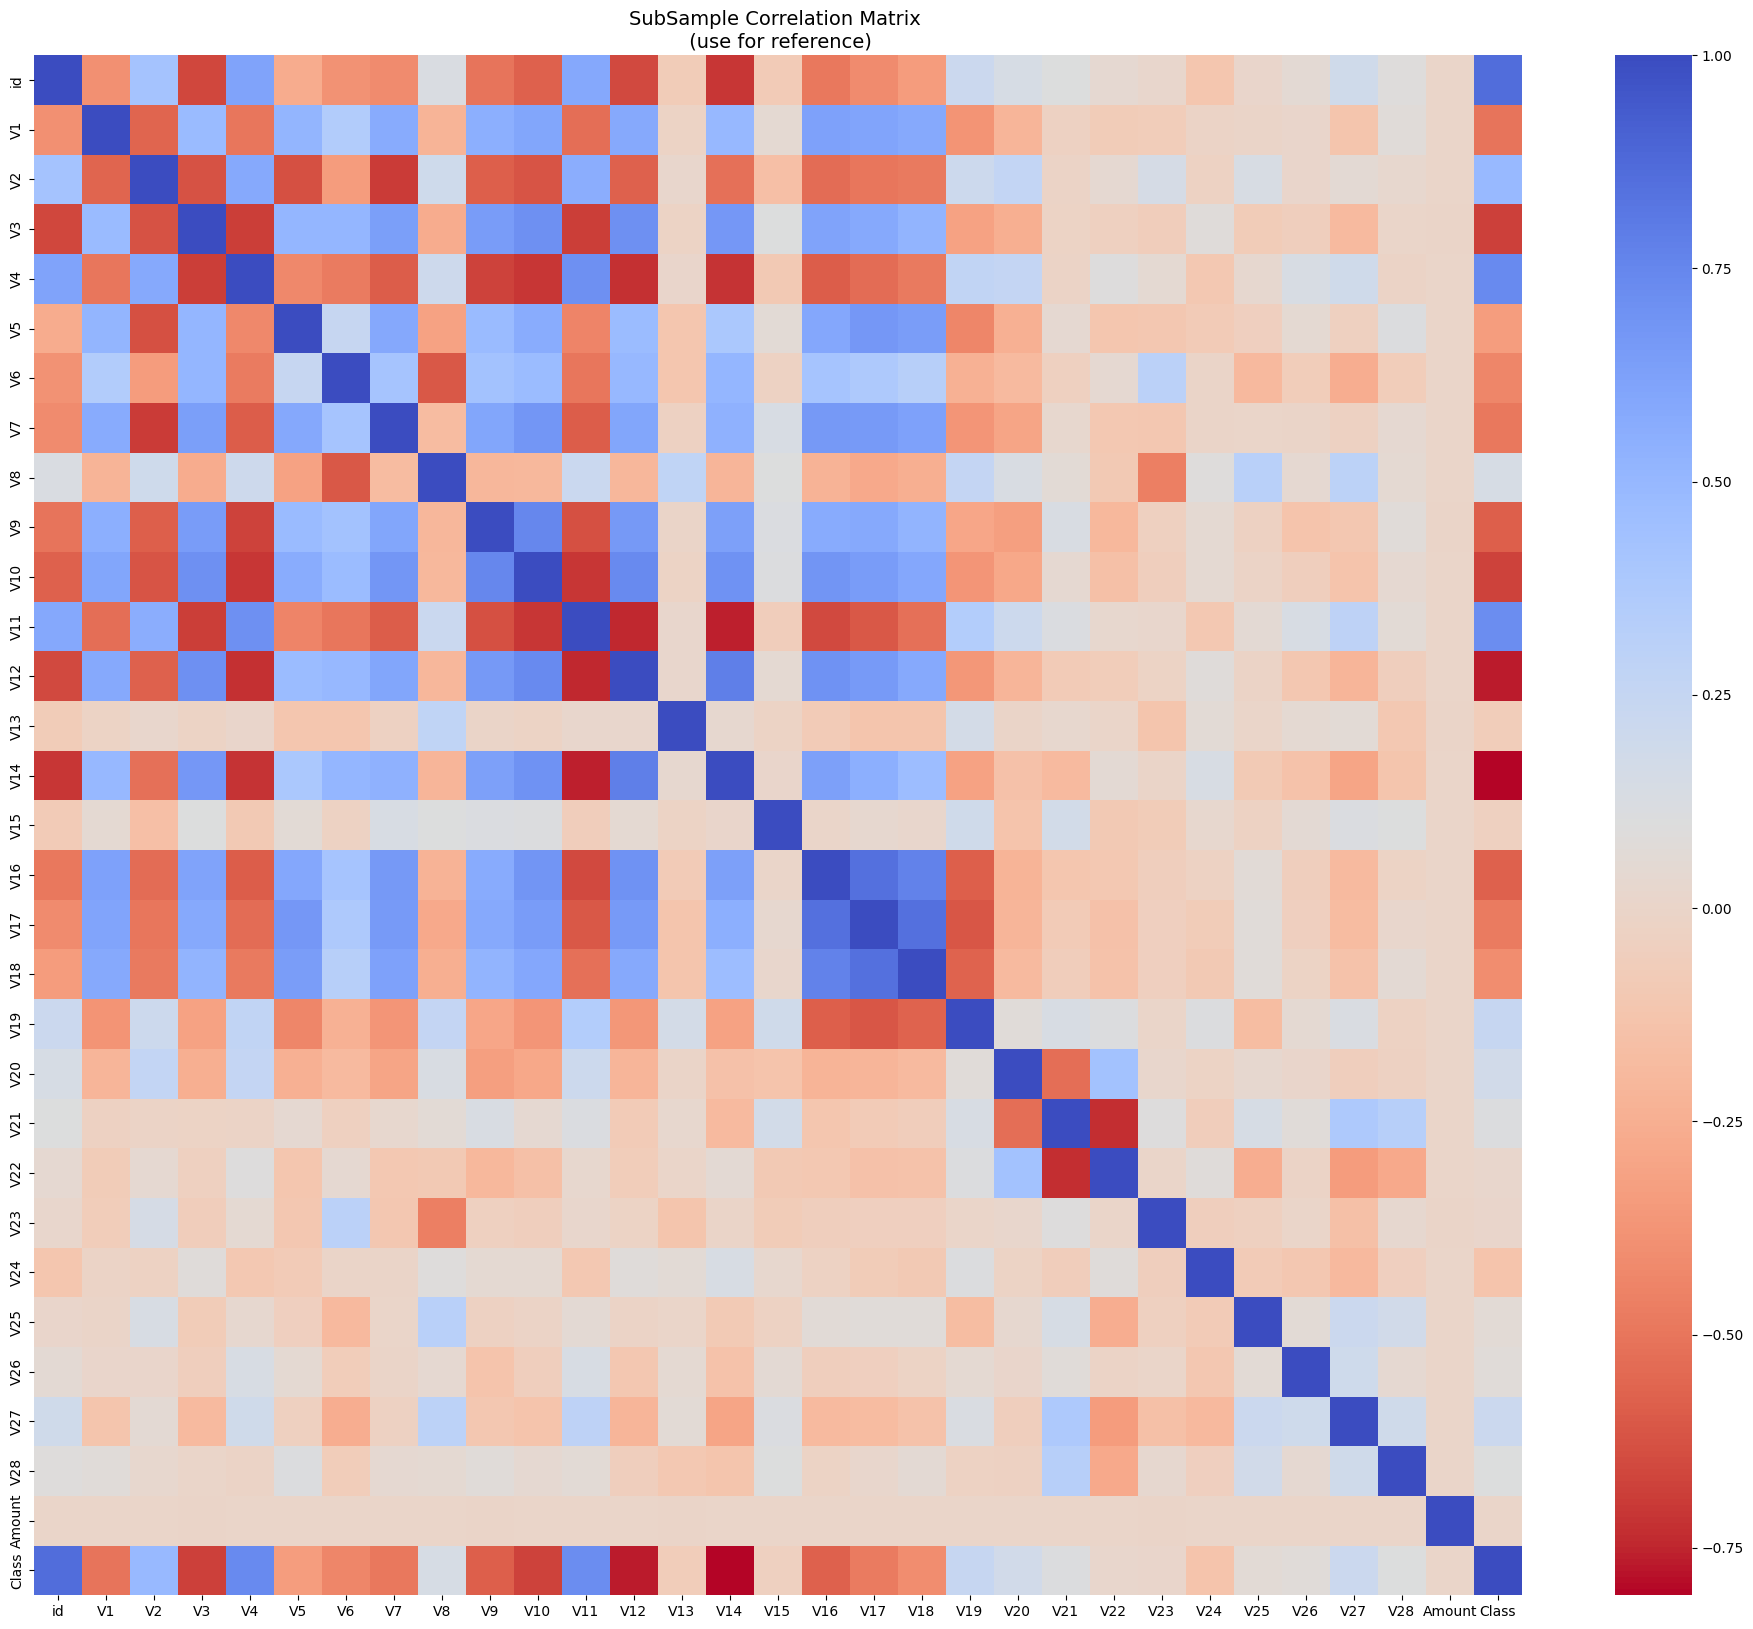

In [17]:
f, ( ax2) = plt.subplots( 1, figsize=(24,20))




sub_sample_corr = df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

<ipython-input-18-476dbf31356c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[0])
<ipython-input-18-476dbf31356c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1])
<ipython-input-18-476dbf31356c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=df, palette=colors, ax=axes[2])
<ipython-input-18-476dbf31356c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

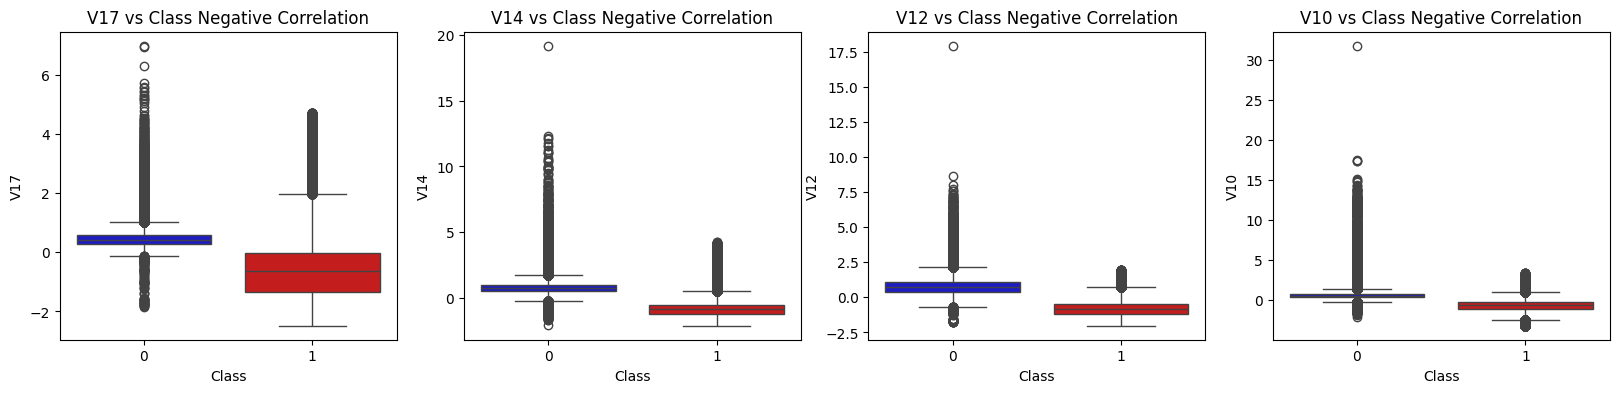

In [18]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

<ipython-input-19-257eea93a7a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V11", data=df, palette=colors, ax=axes[0])
<ipython-input-19-257eea93a7a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V4", data=df, palette=colors, ax=axes[1])
<ipython-input-19-257eea93a7a9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V2", data=df, palette=colors, ax=axes[2])
<ipython-input-19-257eea93a7a9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

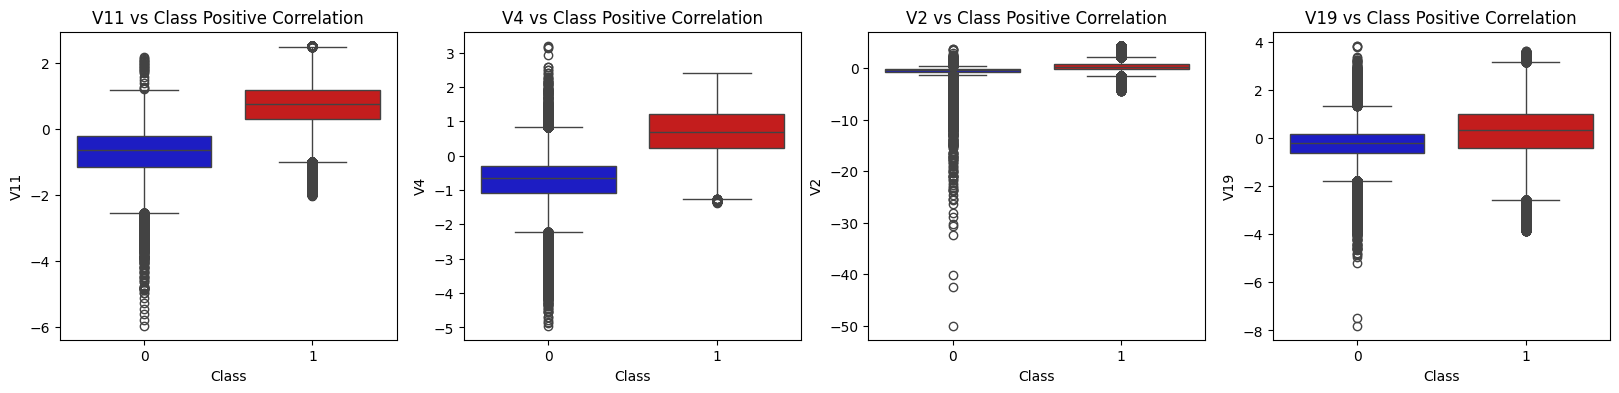

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

<ipython-input-20-2537072093b8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
<ipython-input-20-2537072093b8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
<ipython-input-20-2537072093b8>:1

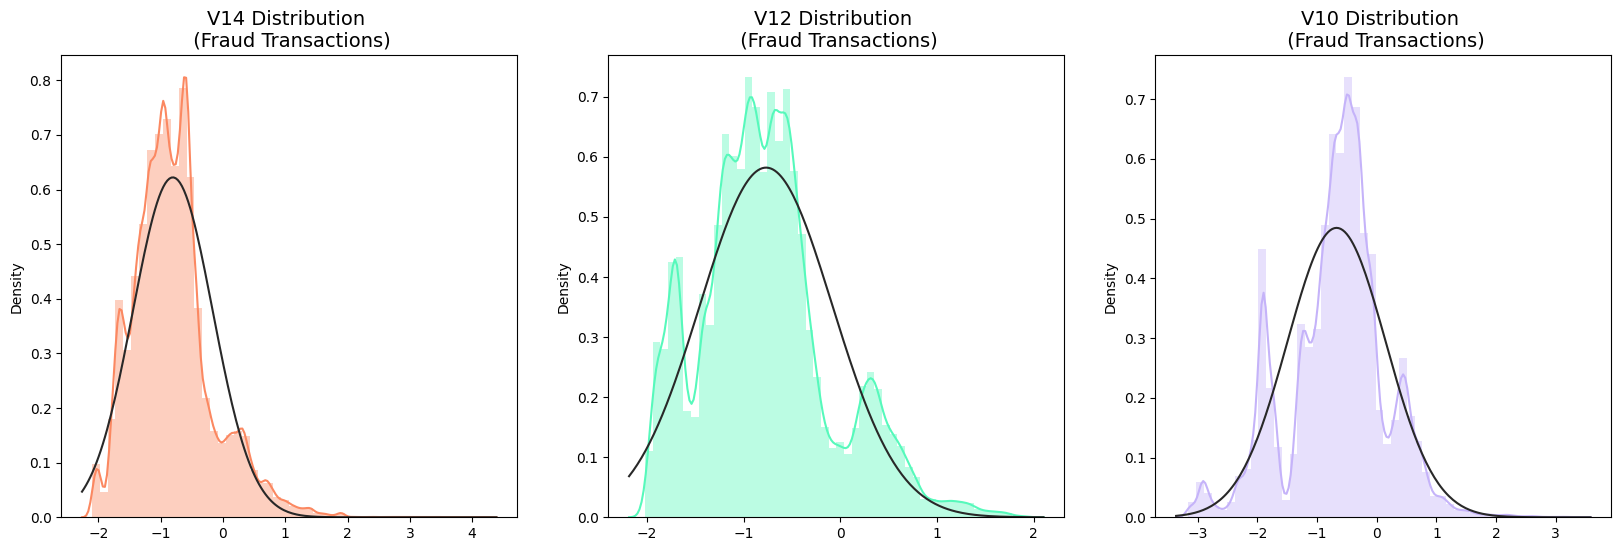

In [20]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [21]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
new_df=df
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -1.2285368984123033 | Quartile 75: -0.5289145976230123
iqr: 0.699622300789291
Cut Off: 1.0494334511839365
V14 Lower: -2.27797034959624
V14 Upper: 0.5205188535609242
Feature V14 Outliers for Fraud Cases: 10944
V10 outliers:[0.5404556908682421, 1.862279576071128, 0.7225465455369166, 0.636135276899784, 1.0693095957223129, 0.6974653743768972, 0.7103446762156719, 0.8268395041703162, 1.4255260115725714, 0.5700574652223706, 1.0280642294390383, 1.1805720741730288, 1.6910140360710486, 0.7665799869117838, 4.233467307617315, 0.8407640999910049, 1.2348101097699944, 1.9322275100364612, 1.6400089328646992, 1.4667553865486596, 1.169254493639492, 0.8624494775414727, 1.4580656636878353, 0.7801305225075927, 0.628542905240085, 1.3892222535941436, 0.781165672472711, 1.3886724933758037, 0.9005434780921936, 0.9996929118555024, 1.0477210119688611, 0.6791796984926893, 0.8383241980063032, 0.5280160808188159, 0.6236223093657104, 1.4188795434968904, 0.6629703898463443, 1.00762330672517, 0.5952984396

<ipython-input-22-3983bcdc8a91>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
<ipython-input-22-3983bcdc8a91>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
<ipython-input-22-3983bcdc8a91>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)


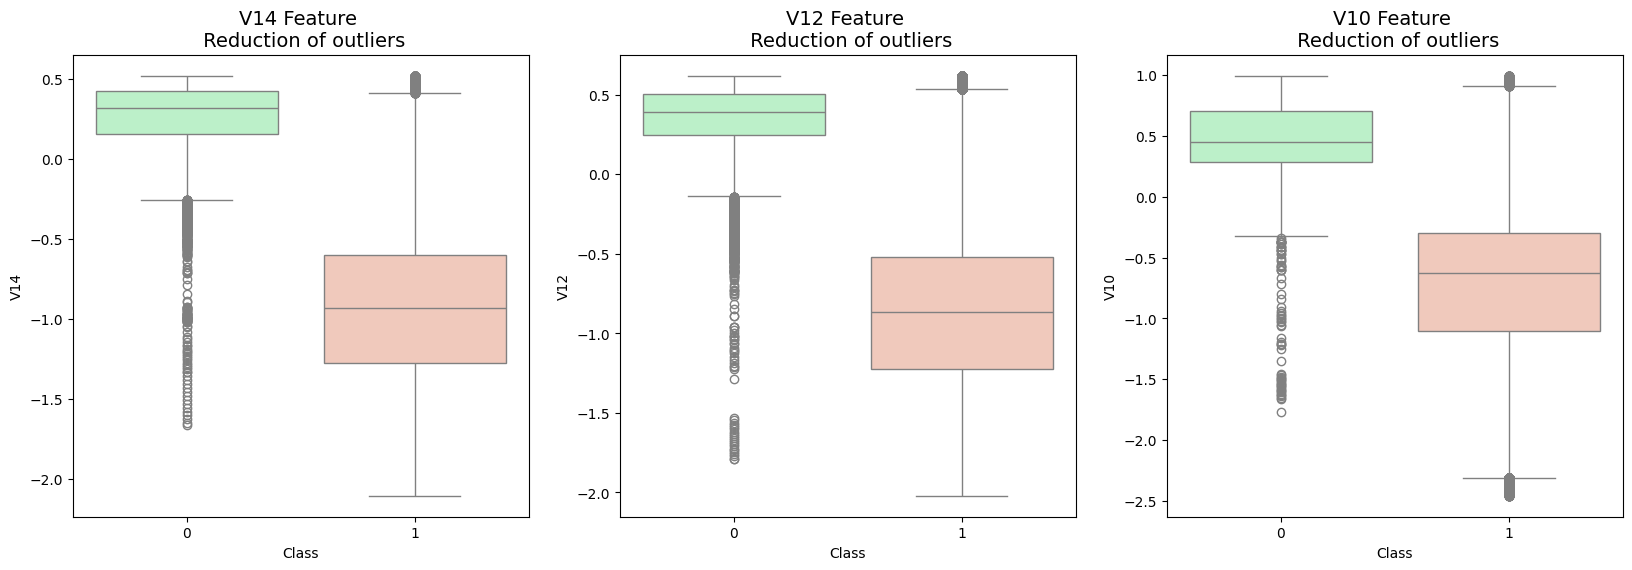

In [22]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [23]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']


In [24]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [26]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier # Import MLPClassifier for Neural Networks

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "Neural Network": MLPClassifier()  # Add Neural Network classifier
}

In [27]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 100.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 100.0 % accuracy score
[LightGBM] [Info] Number of positive: 206943, number of negative: 20457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227400, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.910040 -> initscore=2.314118
[LightGBM] [Info] Start training from score 2.314118
[LightGBM] [Info] Number of positive: 165554, number of negative: 16366
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you c

In [30]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, auc

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


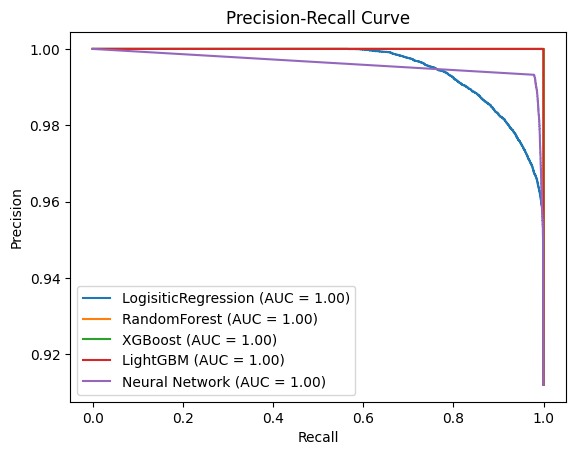

In [31]:
from sklearn.metrics import precision_recall_curve, auc

for key, classifier in classifiers.items():
    # Get predicted probabilities for positive class
    y_scores = classifier.predict_proba(X_test)[:, 1]

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    # Plot the curve
    plt.plot(recall, precision, label=f'{key} (AUC = {auc(recall, precision):.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [32]:
for key, classifier in classifiers.items():
    # Get predicted probabilities for positive class
    y_scores = classifier.predict_proba(X_test)[:, 1]

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_scores)

    print(f"ROC AUC Score for {classifier.__class__.__name__}: {roc_auc:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ROC AUC Score for LogisticRegression: 0.96
ROC AUC Score for RandomForestClassifier: 1.00
ROC AUC Score for XGBClassifier: 1.00
ROC AUC Score for LGBMClassifier: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


ROC AUC Score for MLPClassifier: 0.96


In [33]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.1 MB/s eta 0:00:00


In [34]:
import shap

# Choose a model to explain (replace with your desired model)
model = classifiers["RandomForest"]

# Create a TreeExplainer object (for tree-based models)
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for a subset of test data (for efficiency)
shap_values = explainer.shap_values(X_test[:100])

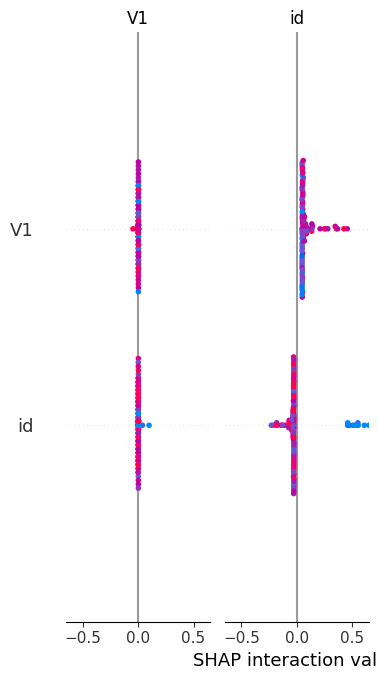

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 10

In [39]:
# Summary plot for overall feature importance
shap.summary_plot(shap_values, X_test[:100])

# Dependence plot for a specific feature (e.g., V14)
shap.dependence_plot("V14", shap_values, X_test[:100])

In [40]:
print(len(shap_values))  # Check if it's a list (should be 2 for binary classification)
if isinstance(shap_values, list):
    print(shap_values[0].shape)  # Check the shape of the first array
    print(shap_values[1].shape)  # Check the shape of the second array


100
